In [1]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 611.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 2.1 MB/s eta 0

In [2]:
import numpy as np
import gradio as gr
import tensorflow as tf
import math
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [3]:
import plotly.express as px
import pandas as pd

In [4]:
#gdrive mount . 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

inception_net = tf.keras.models.load_model('/content/drive/MyDrive/model_resnet')




In [6]:

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (160, math.floor(h/(w/160))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/160)), 160))
  return img


def classify_image(inp):
    inp = inp.reshape((1, 160, 160, 3))
    prediction = inception_net.predict(inp).flatten()


    x = ['fail', 'sucess']
    y = [prediction[0], prediction[1]]
    data = pd.DataFrame()
    data['S_F'] = x
    data['Prob'] = y
    # create a new plot
    p = px.bar(data, x='S_F', y='Prob')

    return p 


outputs = gr.Plot()


demo = gr.Interface(classify_image, 
                    inputs=gr.Image(shape=(160, 160)),
                    outputs=outputs)
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://dbd582bd87576e3ee8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [7]:
def example(image):
    image = image.reshape((1, 160, 160, 3))
    prediction = inception_net.predict(image).flatten()
    return {class_names[i]: float(prediction[i]) for i in range(2)}
    
class_names = ['fail', 'suc']







demo = gr.Interface(example,
                    inputs=gr.Image(shape=(160, 160)),
                    outputs=gr.Label(num_top_classes = 2)
)
demo.launch(share = True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9d2154cc532cec6da0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [8]:

prediction = inception_net.predict(image).flatten()


NameError: ignored

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


x = np.arange(2)
years = ['suc', 'fail']
values = [suc, fail]

plt.bar(x, values, color = ['green','firebrick'])
plt.xticks(x, years)

plt.show()
plt.savefig('balance.png') 

In [ ]:
import os 

suc = len(os.listdir("/content/drive/MyDrive/CV/Suc"))
fail = len(os.listdir("/content/drive/MyDrive/CV/Fail"))

In [ ]:
import os

import cv2
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import Sequential, layers
import pickle
from tqdm.notebook import tqdm

In [ ]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

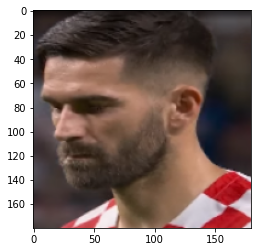

In [ ]:
result = resize_and_rescale(img)
plt.imshow(result)

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
])

In [ ]:
image = tf.cast(tf.expand_dims(img, 0), tf.float32)


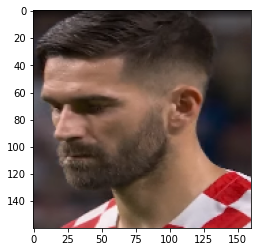

In [ ]:
img = load_img('/content/drive/MyDrive/CV/Fail/20230322_142943.png', target_size = (160,160))
plt.imshow(img)

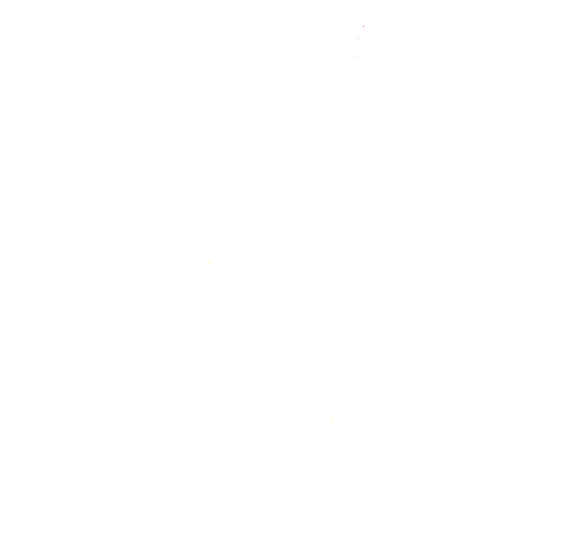

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(img)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# train_datagen = ImageDataGenerator(rescale = 1.0/255.)
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
img = np.array(img)
img.shape

(160, 160, 3)

In [ ]:
img = img.reshape(1,160,160,3)

In [ ]:
temp = test_datagen.fit(img)


In [ ]:
temp

In [ ]:
image_string=tf.io.read_file("/content/drive/MyDrive/CV/Fail/20230322_152439.png")
image=tf.image.decode_jpeg(image_string,channels=3)

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

In [ ]:
def visualize1(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented, cmap = 'gray')

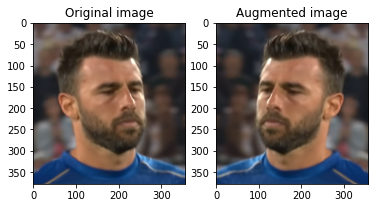

In [ ]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

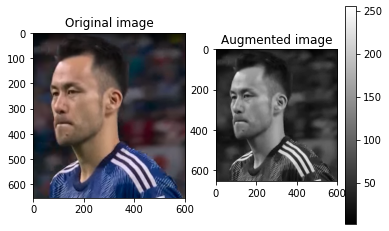

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize1(image, tf.squeeze(grayscaled))
plt.colorbar()